# <center>Time Series Forecasting using FbProphet

In [1]:
# pip install pystan
# conda install -c conda-forge fbprophet

     ---------------------------------------- 0.0/91.8 kB ? eta -:--:--
     ------------------------------- -------- 71.7/91.8 kB 1.3 MB/s eta 0:00:01
     ---------------------------------------- 91.8/91.8 kB 1.3 MB/s eta 0:00:00
     ---------------------------------------- 0.0/151.9 kB ? eta -:--:--
     ----------------------------------- -- 143.4/151.9 kB 4.2 MB/s eta 0:00:01
     -------------------------------------- 151.9/151.9 kB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 0.0/79.8 MB ? eta -:--:--
     ---------------------------------------- 0.3/79.8 MB 6.5 MB/s eta 0:00:13
     ---------------------------------------- 0.9/79.8 MB 9.5 MB/s eta 0:00:09
     - -------------------------------------- 2.0/79.8 MB 14.2 MB/s eta 0:00:06
     - -------------------------------------- 3.3/79.8 MB 17.5 MB/s eta 0:00:05
     -- ------------------------------------- 5.1/79.8 MB 21.9 MB/s eta 0:00:04
     -- ------------------------------------- 5.8/79.8 MB 23.2 MB

In [15]:
import pandas as pd
import fbprophet
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
df=pd.read_csv('airline_passengers.csv')
df.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [3]:
df.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


<AxesSubplot:>

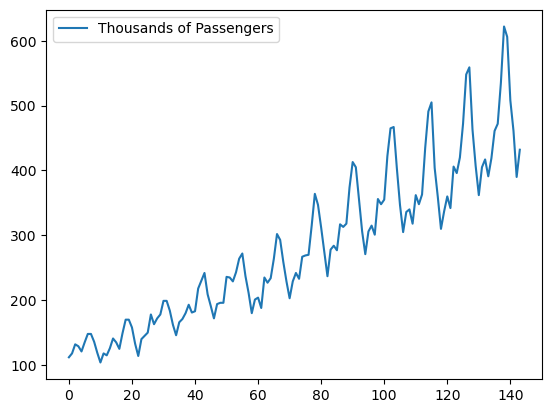

In [4]:
df.plot()

In [12]:
df.columns=['ds','y']
df.head()

,ds,y
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [11]:
df.drop(144,axis=0,inplace=True)

In [7]:
df.tail()

,ds,y
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0


In [13]:
df['ds']=pd.to_datetime(df['ds'])
df.head()

,ds,y
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [17]:
from fbprophet import Prophet

In [18]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_col

In [19]:
#initialize the model
model=Prophet()

In [22]:
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\hp\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [24]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [23]:
#create future dates of 365 days
future_dates=model.make_future_dataframe(periods=365)

In [25]:
prediction=model.predict(future_dates)

C:\Users\hp\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\hp\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [26]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,106.320611,53.999932,112.238882,106.320611,106.320611,-21.941934,-21.941934,-21.941934,-21.941934,-21.941934,-21.941934,0.0,0.0,0.0,84.378677
1,1949-02-01,108.500995,49.590272,105.412905,108.500995,108.500995,-30.714169,-30.714169,-30.714169,-30.714169,-30.714169,-30.714169,0.0,0.0,0.0,77.786826
2,1949-03-01,110.470374,81.270490,138.775079,110.470374,110.470374,-0.475833,-0.475833,-0.475833,-0.475833,-0.475833,-0.475833,0.0,0.0,0.0,109.994541
3,1949-04-01,112.650758,78.835436,135.123123,112.650758,112.650758,-5.203855,-5.203855,-5.203855,-5.203855,-5.203855,-5.203855,0.0,0.0,0.0,107.446903
4,1949-05-01,114.760808,80.763316,139.904508,114.760808,114.760808,-3.825854,-3.825854,-3.825854,-3.825854,-3.825854,-3.825854,0.0,0.0,0.0,110.934953


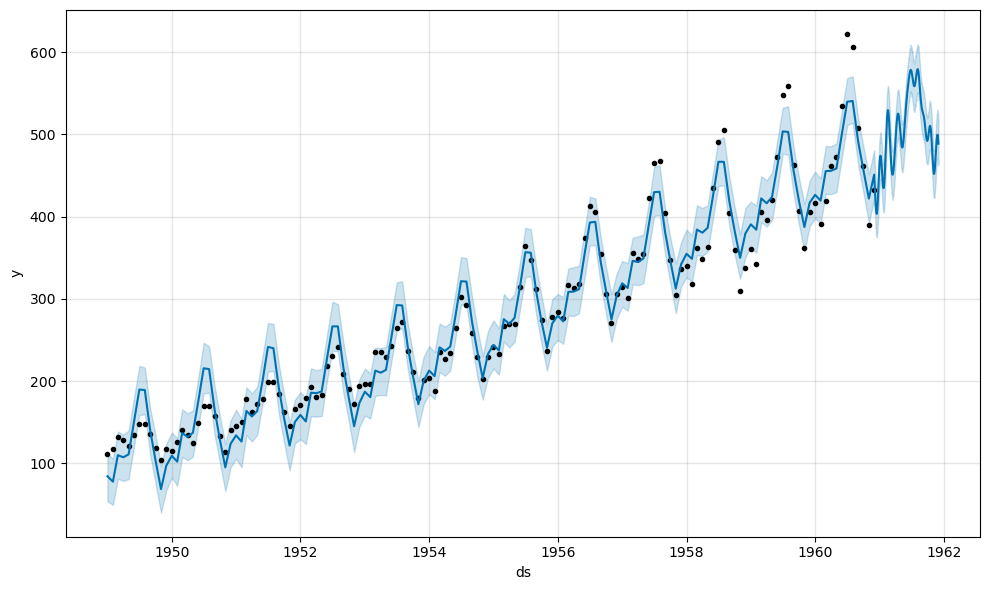

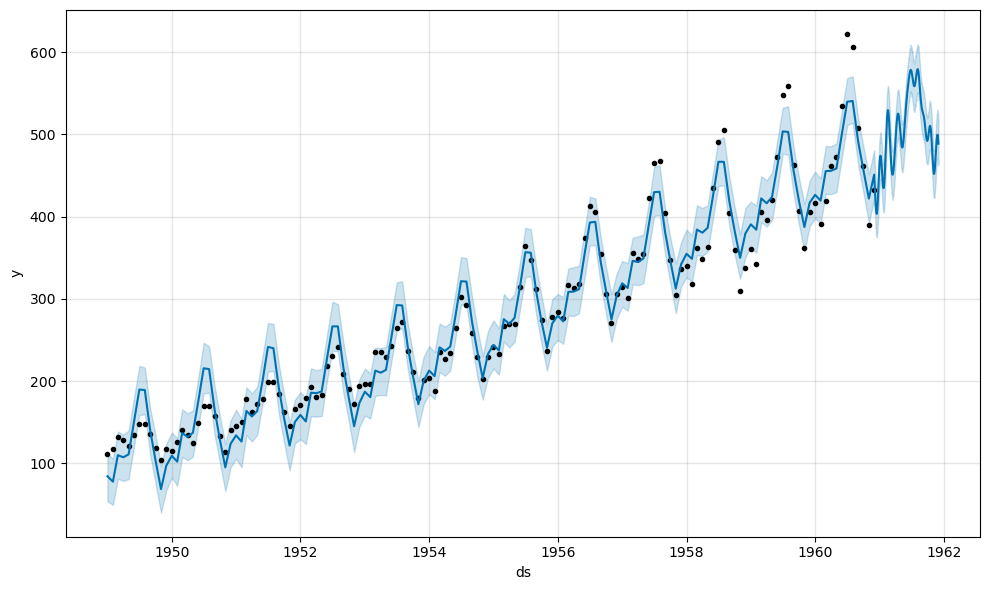

In [27]:
model.plot(prediction)

C:\Users\hp\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


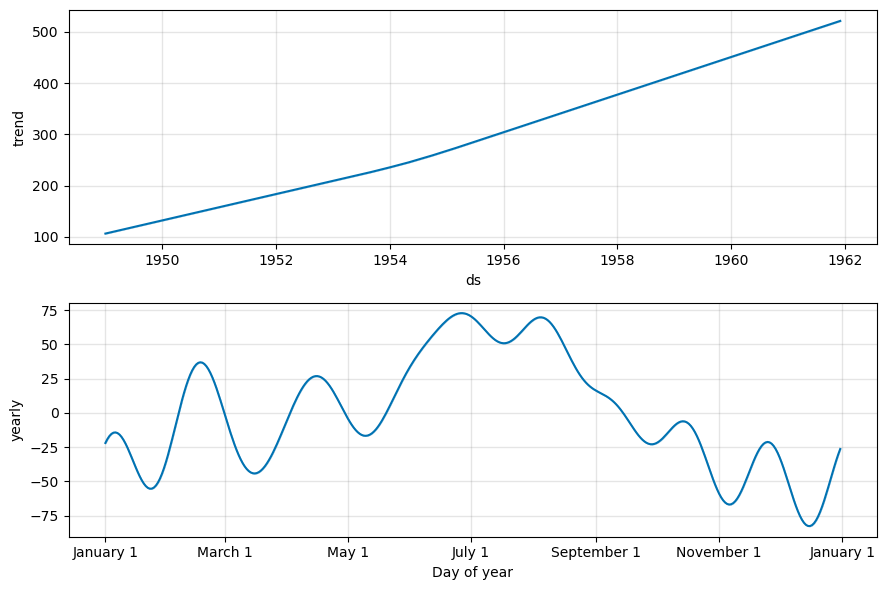

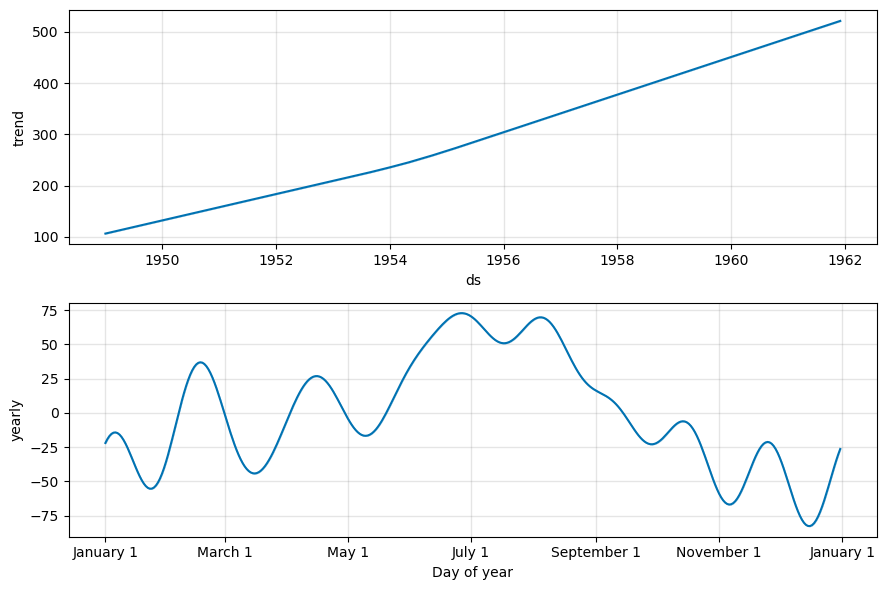

In [28]:
#visualize each components [Trends, Weekly]
model.plot_components(prediction)

In [29]:
from fbprophet.diagnostics import cross_validation
df_cv=cross_validation(model,initial='730 days',period='180 days',horizon="365 days")
df_cv.head()

INFO:fbprophet:Making 19 forecasts with cutoffs between 1951-01-18 00:00:00 and 1959-12-02 00:00:00


  0%|          | 0/19 [00:00<?, ?it/s]

C:\Users\hp\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:n_changepoints greater than number of observations. Using 19.
C:\Users\hp\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\hp\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\hp\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\hp\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\hp\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\hp\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\hp\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\hp\anaconda

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1951-02-01,156.819730,156.595831,157.063837,150.0,1951-01-18
1,1951-03-01,169.267028,168.551958,170.085120,178.0,1951-01-18
2,1951-04-01,156.601332,155.116378,158.333477,163.0,1951-01-18
3,1951-05-01,142.228261,139.762119,144.916594,172.0,1951-01-18
4,1951-06-01,177.404761,173.894306,181.234480,178.0,1951-01-18


In [30]:
from fbprophet.diagnostics import performance_metrics
df_p=performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,40 days,1085.982413,32.954247,25.858707,0.078429,0.073811,0.227273
1,42 days,1013.087718,31.829039,25.298741,0.077251,0.073811,0.181818
2,46 days,910.373154,30.172391,24.801127,0.079580,0.084098,0.136364
3,47 days,1044.626120,32.320676,26.980818,0.082844,0.085696,0.136364
4,48 days,1033.404419,32.146608,26.391799,0.080742,0.085696,0.181818


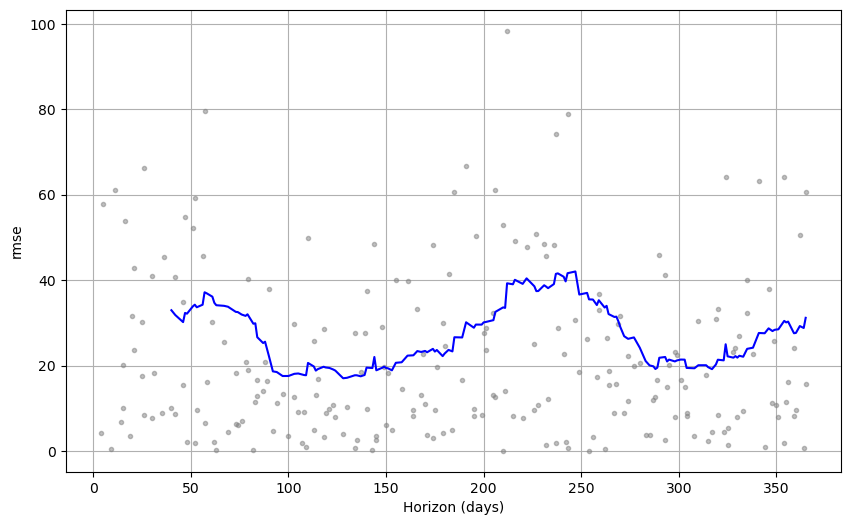

In [31]:
from fbprophet.plot import plot_cross_validation_metric
fig=plot_cross_validation_metric(df_cv,metric='rmse')